In [1]:
import sys
sys.path.append('../../PI_GP_regressor')

from main_class import PhysicsInformedGP_regressor
from kernels.kernel_oscillator_3variables import gram_Matrix,k_ff, k_fu, k_uf, k_uu
import numpy as np

 /home/tobias/anaconda3/envs/bac_arbeit/lib/python3.10/site-packages/scipy/stats/_qmc.py:804: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 /home/tobias/anaconda3/envs/bac_arbeit/lib/python3.10/site-packages/scipy/stats/_qmc.py:804: UserWarning:The balance properties of Sobol' points require n to be a power of 2.


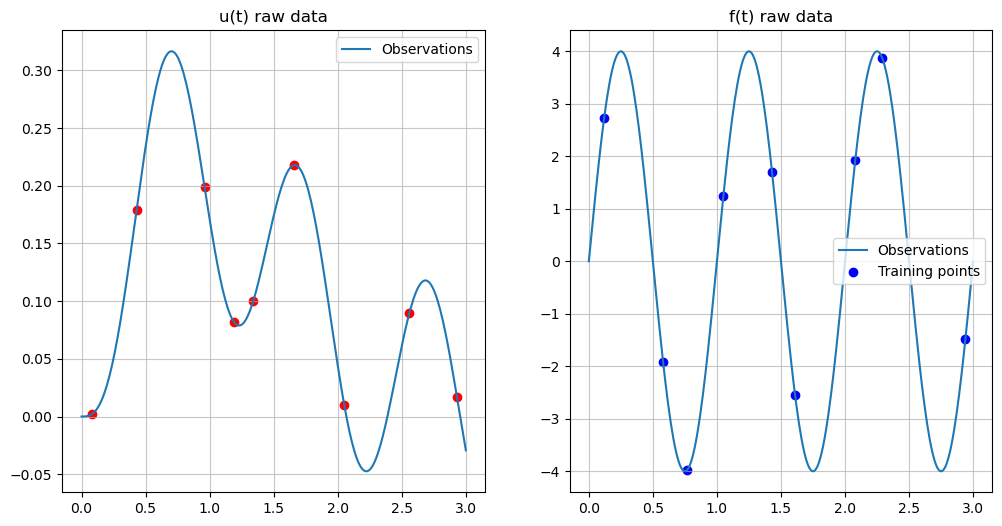

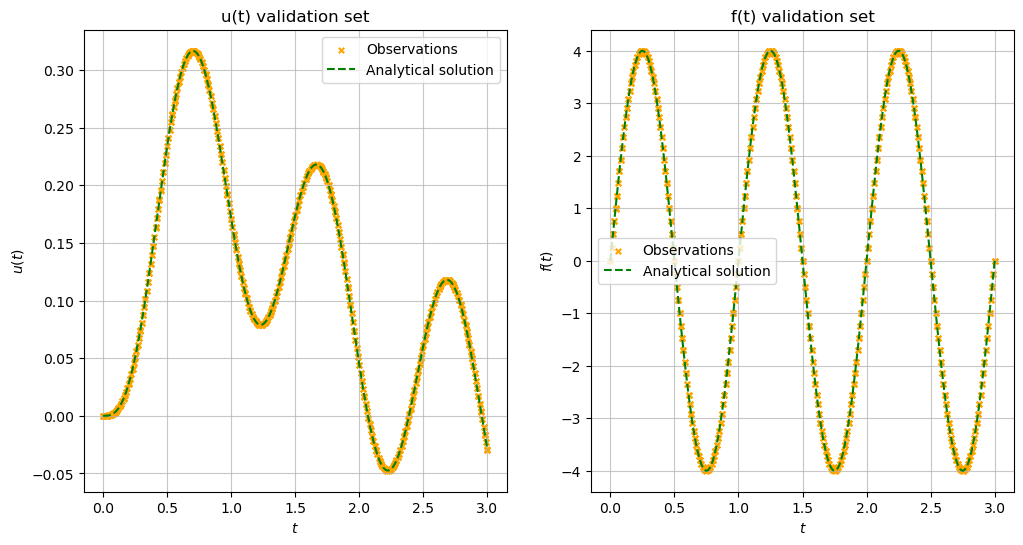

In [2]:
kernel = [gram_Matrix,k_uu,k_uf,k_fu,k_ff]
params = ["l","sigma_f","m","b","k"]
seeds_training = [50,14] #sets the seeds for the random training points--- change when the points are not optimal
model = PhysicsInformedGP_regressor(kernel,timedependence=False, params = params)
model.set_training_data("damped_m1k2b1.csv",9,[1e-8,1e-8],seeds_training)
model.plot_raw_data(Training_points=True)
model.set_validation_data(1200)
model.plot_validation_set()


In [25]:
def get_initial_values():
    """returns the initial values for the hyperparameters
    for the length scales we initialize them randomly as log(l) ~ U(-2.5,1)
    """
    rng = np.random.default_rng()
    theta_initial = np.zeros((5))
    theta_initial[0] = np.exp(rng.uniform(-1.3, 0.3, 1))
    theta_initial[1] = rng.uniform(0, 1, 1)
    theta_initial[2] = rng.uniform(0, 3, 1)
    theta_initial[3] = rng.uniform(0, 3, 1)
    theta_initial[4] = rng.uniform(1, 4, 1)
    return theta_initial
n_iterations, n_threads = 4000, 10

# model.train("TNC",500,n_threads,{'theta_initial': get_initial_values,   #needed for all optimization methods
#                                            'bounds': ((1e-2, None), (1e-5, None), (1e-2, None),(1e-2, None),(1e-2,None)), #needed for TNC and L-BFGS-B
#                                            'gtol': 1e-6})
model.train("Nelder-Mead",n_iterations,n_threads,{'theta_initial': get_initial_values,   #needed for all optimization methods
                                            'bounds': ((1e-2, None), (1e-5, None), (1e-2, None),(1e-2, None),(1e-2,None)), #needed for TNC and L-BFGS-B
                                            'gtol': 1e-6})
# model.train("L-BFGS-B",n_iterations,n_threads,{'theta_initial': get_initial_values,   #needed for all optimization methods
#                                             'bounds': ((1e-2, None), (1e-5, None), (1e-2, None),(1e-2, None),(1e-2,None)), #needed for TNC and L-BFGS-B
#                                             'gtol': 1e-6})
      

100%|██████████| 4000/4000 [04:16<00:00, 15.60it/s]


       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: -4.355005264282227
             x: [ 4.891e-01  5.860e-01  9.990e-01  1.993e+00  1.999e+00]
           nit: 476
          nfev: 828
 final_simplex: (array([[ 4.891e-01,  5.860e-01, ...,  1.993e+00,
                         1.999e+00],
                       [ 4.891e-01,  5.860e-01, ...,  1.993e+00,
                         1.999e+00],
                       ...,
                       [ 4.891e-01,  5.860e-01, ...,  1.993e+00,
                         1.999e+00],
                       [ 4.891e-01,  5.860e-01, ...,  1.993e+00,
                         1.999e+00]]), array([-4.355e+00, -4.355e+00, -4.355e+00, -4.355e+00,
                       -4.355e+00, -4.355e+00]))


In [26]:
print(model.get_params())

[0.48909158 0.58601285 0.99895693 1.99258569 1.99875862]


In [3]:
results = {"nf_n=9_melder": (np.array([0.47898825, 0.62987094, 0.998272  , 1.99920782, 2.00517421]),-4.336967468261719, [1e-8,1e-8]),
           "nf_n=9_TNC": (np.array([0.43243174, 0.30849485, 0.99643949, 1.98091363, 1.97461053]),-2.882169723510742, [1e-8,1e-8]),
            "nf_n=9_melder_4000":([0.48909158, 0.58601285, 0.99895693, 1.99258569, 1.99875862],-4.355005264282227, [1e-8,1e-8])}

In [4]:
model.set_params(results["nf_n=9_melder_4000"][0])

 /home/tobias/code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:545: RuntimeWarning:invalid value encountered in sqrt
 /home/tobias/code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:546: RuntimeWarning:invalid value encountered in sqrt
 /home/tobias/code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:559: RuntimeWarning:invalid value encountered in sqrt
 /home/tobias/code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:560: RuntimeWarning:invalid value encountered in sqrt


{'u': 1.4192092123721523e-07, 'f': 0.004609841387718916}

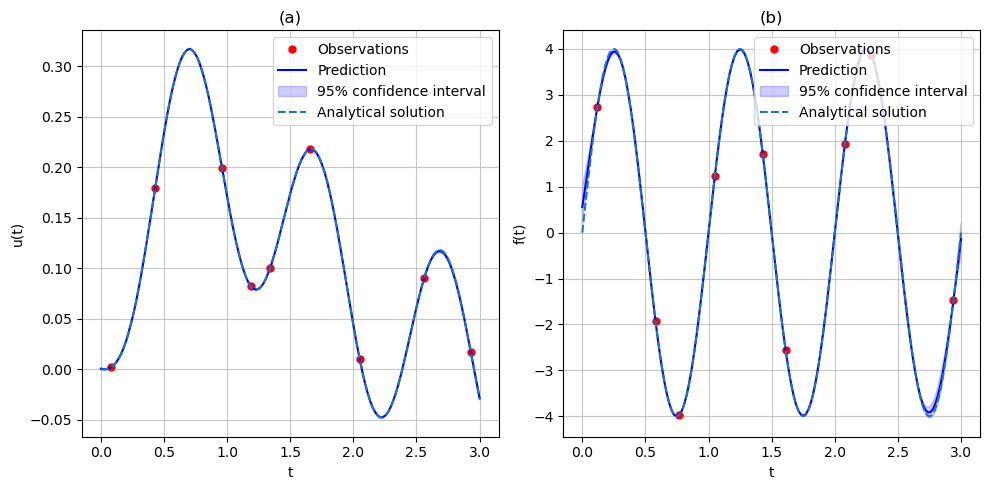

In [5]:
X_star = np.linspace(0,3,150).reshape(-1,1)
model.predict_model(X_star)
model.set_axis_labels("x","u(x)")
model.plot_prediction(X_star, "prediction", "prediction.png")
model.error()
model.MSE
#print(model)

 /home/tobias/code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:1002: RuntimeWarning:invalid value encountered in sqrt
 /home/tobias/code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:1003: RuntimeWarning:invalid value encountered in sqrt
 /home/tobias/code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:1016: RuntimeWarning:invalid value encountered in sqrt
 /home/tobias/code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:1017: RuntimeWarning:invalid value encountered in sqrt


---------GPY--------
MSE u:  0.0005469740851882291
MSE f:  2.6924414196064235


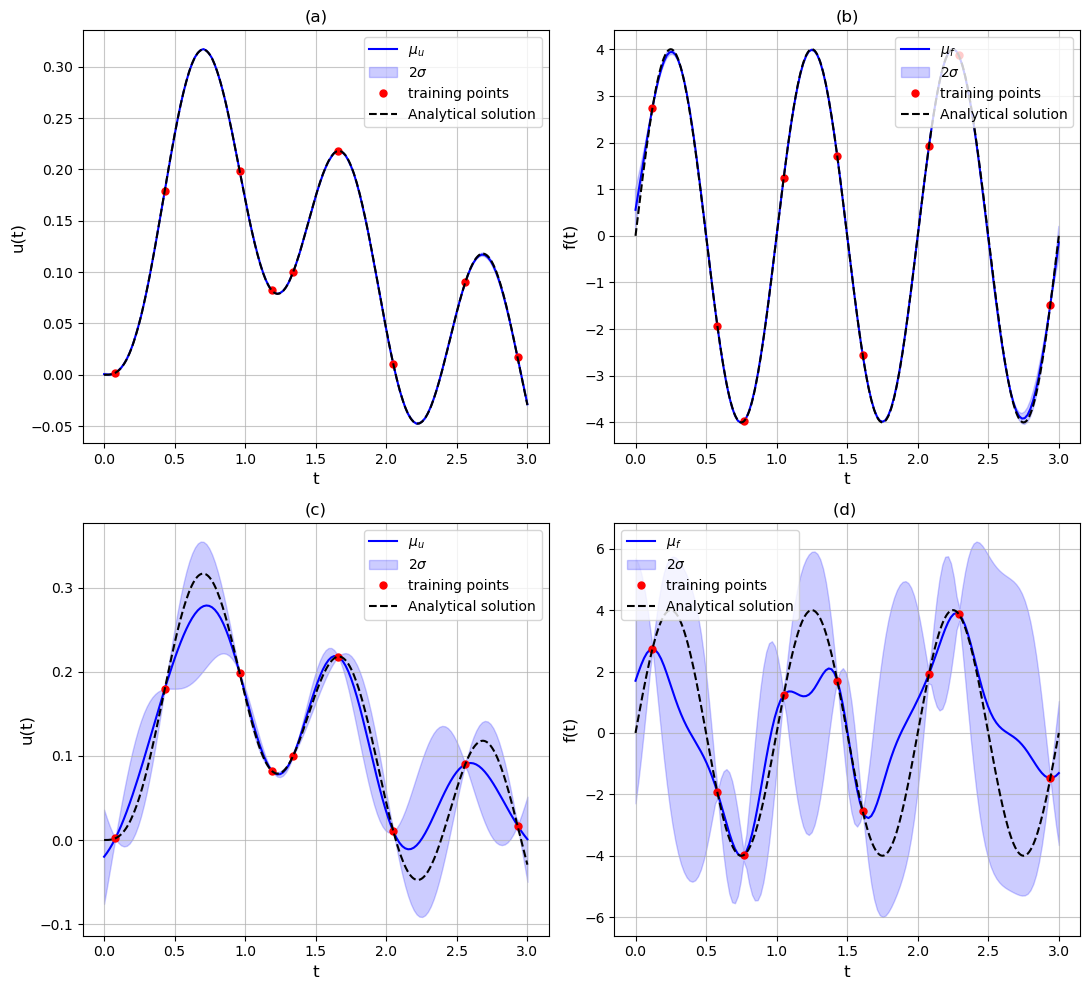

In [6]:
model.plot_merged_1d_plots(X_star, "merged_1d_plots.png",(11,10))

 /home/tobias/anaconda3/envs/bac_arbeit/lib/python3.10/site-packages/scipy/stats/_qmc.py:804: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 /home/tobias/anaconda3/envs/bac_arbeit/lib/python3.10/site-packages/scipy/stats/_qmc.py:804: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
100%|██████████| 200/200 [00:14<00:00, 13.50it/s]


       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 2.5860209465026855
             x: [ 3.834e-01  2.594e-01  9.354e-01  2.064e+00  2.436e+00]
           nit: 317
          nfev: 558
 final_simplex: (array([[ 3.834e-01,  2.594e-01, ...,  2.064e+00,
                         2.436e+00],
                       [ 3.834e-01,  2.594e-01, ...,  2.064e+00,
                         2.436e+00],
                       ...,
                       [ 3.834e-01,  2.594e-01, ...,  2.064e+00,
                         2.436e+00],
                       [ 3.834e-01,  2.594e-01, ...,  2.064e+00,
                         2.436e+00]]), array([ 2.586e+00,  2.586e+00,  2.586e+00,  2.586e+00,
                        2.586e+00,  2.586e+00]))


{'u': 0.00014296919107437134, 'f': 0.07974307984113693}

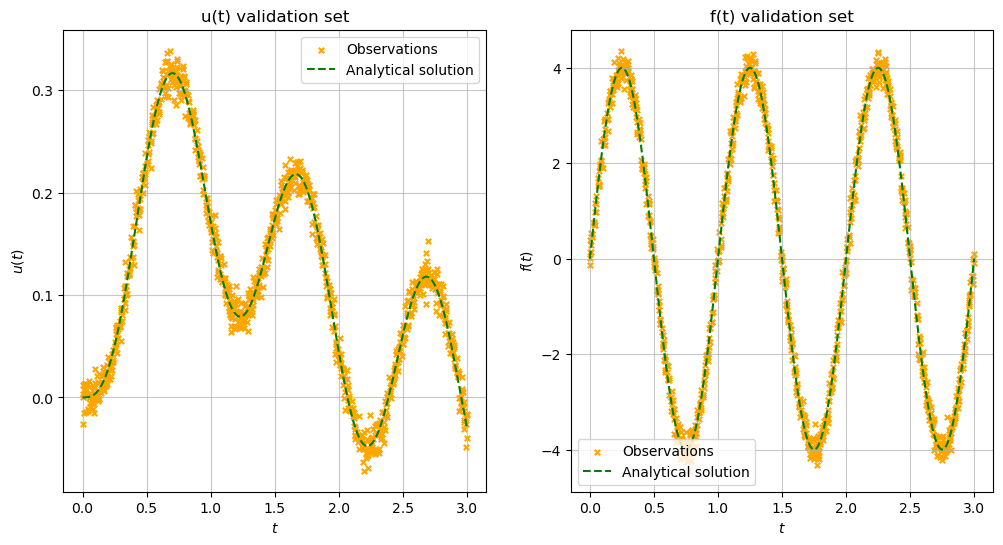

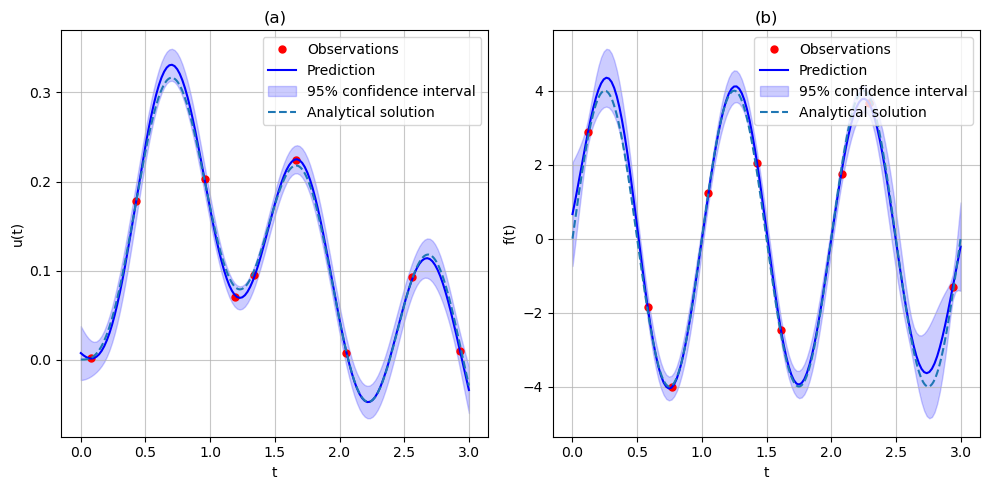

In [23]:
model2 = PhysicsInformedGP_regressor(kernel,timedependence=False, params = params)
model2.set_training_data("damped_m1k2b1.csv",9,[1e-4,3e-2],seeds_training)
model2.set_validation_data(1000)
model2.plot_validation_set()
n_iterations = 200
model2.train("Nelder-Mead",n_iterations,n_threads,{'theta_initial': get_initial_values,   #needed for all optimization methods
                                            'bounds': ((1e-2, None), (1e-5, None), (1e-2, None),(1e-2, None),(1e-2,None)), #needed for TNC and L-BFGS-B
                                            'gtol': 1e-6})
# model.train("L-BFGS-B",n_iterations,n_threads,{'theta_initial': get_initial_values,   #needed for all optimization methods
#                                             'bounds': ((1e-2, None), (1e-5, None), (1e-2, None),(1e-2, None),(1e-2,None)), #needed for TNC and L-BFGS-B
#                                             'gtol': 1e-6})model2.set_params(x2)
model2.predict_model(X_star)
model2.plot_prediction(X_star,"",None)
model2.error()
model2.MSE


 /home/tobias/anaconda3/envs/bac_arbeit/lib/python3.10/site-packages/scipy/stats/_qmc.py:804: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 /home/tobias/anaconda3/envs/bac_arbeit/lib/python3.10/site-packages/scipy/stats/_qmc.py:804: UserWarning:The balance properties of Sobol' points require n to be a power of 2.


This is model with n =  5


100%|██████████| 1000/1000 [01:09<00:00, 14.37it/s]


       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 3.7223825454711914
             x: [ 5.160e-01  2.106e-01  3.092e+00  3.130e+00  1.017e+01]
           nit: 405
          nfev: 724
 final_simplex: (array([[ 5.160e-01,  2.106e-01, ...,  3.130e+00,
                         1.017e+01],
                       [ 5.160e-01,  2.106e-01, ...,  3.130e+00,
                         1.017e+01],
                       ...,
                       [ 5.160e-01,  2.106e-01, ...,  3.130e+00,
                         1.017e+01],
                       [ 5.160e-01,  2.106e-01, ...,  3.130e+00,
                         1.017e+01]]), array([ 3.722e+00,  3.722e+00,  3.722e+00,  3.722e+00,
                        3.722e+00,  3.722e+00]))


 /home/tobias/code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:559: RuntimeWarning:invalid value encountered in sqrt
 /home/tobias/code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:560: RuntimeWarning:invalid value encountered in sqrt
 /home/tobias/anaconda3/envs/bac_arbeit/lib/python3.10/site-packages/scipy/stats/_qmc.py:804: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 /home/tobias/anaconda3/envs/bac_arbeit/lib/python3.10/site-packages/scipy/stats/_qmc.py:804: UserWarning:The balance properties of Sobol' points require n to be a power of 2.


-----------------------------------------------
GP with kernel: 
Training data: (5, 1)
Training targets: (10, 1)
Hyperparameters: {'l': 0.5160173206313662, 'sigma_f': 0.21057959046672522, 'm': 3.0916637410730314, 'b': 3.1298610819273076, 'k': 10.173587908306924}
Log marginal likelihood: 3.7223825454711914
Mean squared error: {'u': 0.005576278083026409, 'f': 4.980834007263184}
-----------------------------------------------

-----------------------------------------------------------
This is model with n =  10


100%|██████████| 1000/1000 [00:56<00:00, 17.78it/s]


       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: -10.107295036315918
             x: [ 4.915e-01  5.731e-01  9.997e-01  2.004e+00  2.011e+00]
           nit: 561
          nfev: 965
 final_simplex: (array([[ 4.915e-01,  5.731e-01, ...,  2.004e+00,
                         2.011e+00],
                       [ 4.915e-01,  5.731e-01, ...,  2.004e+00,
                         2.011e+00],
                       ...,
                       [ 4.915e-01,  5.731e-01, ...,  2.004e+00,
                         2.011e+00],
                       [ 4.915e-01,  5.731e-01, ...,  2.004e+00,
                         2.011e+00]]), array([-1.011e+01, -1.011e+01, -1.011e+01, -1.011e+01,
                       -1.011e+01, -1.011e+01]))


 /home/tobias/code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:545: RuntimeWarning:invalid value encountered in sqrt
 /home/tobias/code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:546: RuntimeWarning:invalid value encountered in sqrt
 /home/tobias/code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:559: RuntimeWarning:invalid value encountered in sqrt
 /home/tobias/code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:560: RuntimeWarning:invalid value encountered in sqrt
 /home/tobias/anaconda3/envs/bac_arbeit/lib/python3.10/site-packages/scipy/stats/_qmc.py:804: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 /home/tobias/anaconda3/envs/bac_arbeit/lib/python3.10/site-packages/scipy/stats/_qmc.py:804: UserWarning:The balance properties of Sobol' points require n to be a power of 2.


-----------------------------------------------
GP with kernel: 
Training data: (10, 1)
Training targets: (20, 1)
Hyperparameters: {'l': 0.4914920957838132, 'sigma_f': 0.5731193315585497, 'm': 0.9996743435971449, 'b': 2.00381801204864, 'k': 2.010570344709888}
Log marginal likelihood: -10.107295036315918
Mean squared error: {'u': 6.386770934341257e-08, 'f': 0.0013116743648424745}
-----------------------------------------------

-----------------------------------------------------------
This is model with n =  20


100%|██████████| 1000/1000 [01:20<00:00, 12.48it/s]


       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: -52.681640625
             x: [ 3.258e-01  1.181e-01  1.001e+00  2.006e+00  2.006e+00]
           nit: 356
          nfev: 659
 final_simplex: (array([[ 3.258e-01,  1.181e-01, ...,  2.006e+00,
                         2.006e+00],
                       [ 3.258e-01,  1.181e-01, ...,  2.006e+00,
                         2.006e+00],
                       ...,
                       [ 3.258e-01,  1.181e-01, ...,  2.006e+00,
                         2.006e+00],
                       [ 3.258e-01,  1.181e-01, ...,  2.006e+00,
                         2.006e+00]]), array([-5.268e+01, -5.268e+01, -5.268e+01, -5.268e+01,
                       -5.268e+01, -5.268e+01]))


 /home/tobias/code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:545: RuntimeWarning:invalid value encountered in sqrt
 /home/tobias/code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:546: RuntimeWarning:invalid value encountered in sqrt
 /home/tobias/code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:559: RuntimeWarning:invalid value encountered in sqrt
 /home/tobias/code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:560: RuntimeWarning:invalid value encountered in sqrt
 /home/tobias/anaconda3/envs/bac_arbeit/lib/python3.10/site-packages/scipy/stats/_qmc.py:804: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 /home/tobias/anaconda3/envs/bac_arbeit/lib/python3.10/site-packages/scipy/stats/_qmc.py:804: UserWarning:The balance properties of Sobol' points require n to be a power of 2.


-----------------------------------------------
GP with kernel: 
Training data: (20, 1)
Training targets: (40, 1)
Hyperparameters: {'l': 0.3258024241325125, 'sigma_f': 0.11812596129288533, 'm': 1.0005509088653657, 'b': 2.0061875400093245, 'k': 2.0055084909117795}
Log marginal likelihood: -52.681640625
Mean squared error: {'u': 2.0009576218171787e-08, 'f': 0.0014629772631451488}
-----------------------------------------------

-----------------------------------------------------------
This is model with n =  50


100%|██████████| 1000/1000 [02:18<00:00,  7.21it/s]


       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: -17.67398452758789
             x: [ 3.186e-01  2.786e-02  9.991e-01  2.009e+00  2.001e+00]
           nit: 140
          nfev: 347
 final_simplex: (array([[ 3.186e-01,  2.786e-02, ...,  2.009e+00,
                         2.001e+00],
                       [ 3.186e-01,  2.786e-02, ...,  2.009e+00,
                         2.001e+00],
                       ...,
                       [ 3.186e-01,  2.786e-02, ...,  2.009e+00,
                         2.001e+00],
                       [ 3.186e-01,  2.786e-02, ...,  2.009e+00,
                         2.001e+00]]), array([-1.767e+01, -1.767e+01, -1.767e+01, -1.767e+01,
                       -1.767e+01, -1.767e+01]))


 /home/tobias/code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:559: RuntimeWarning:invalid value encountered in sqrt
 /home/tobias/code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:560: RuntimeWarning:invalid value encountered in sqrt


-----------------------------------------------
GP with kernel: 
Training data: (50, 1)
Training targets: (100, 1)
Hyperparameters: {'l': 0.31860243181157544, 'sigma_f': 0.027857468671052335, 'm': 0.9991448631949635, 'b': 2.008611542351062, 'k': 2.001346942953027}
Log marginal likelihood: -17.67398452758789
Mean squared error: {'u': 4.7954397786043046e-08, 'f': 1.4855454537610058e-06}
-----------------------------------------------

-----------------------------------------------------------


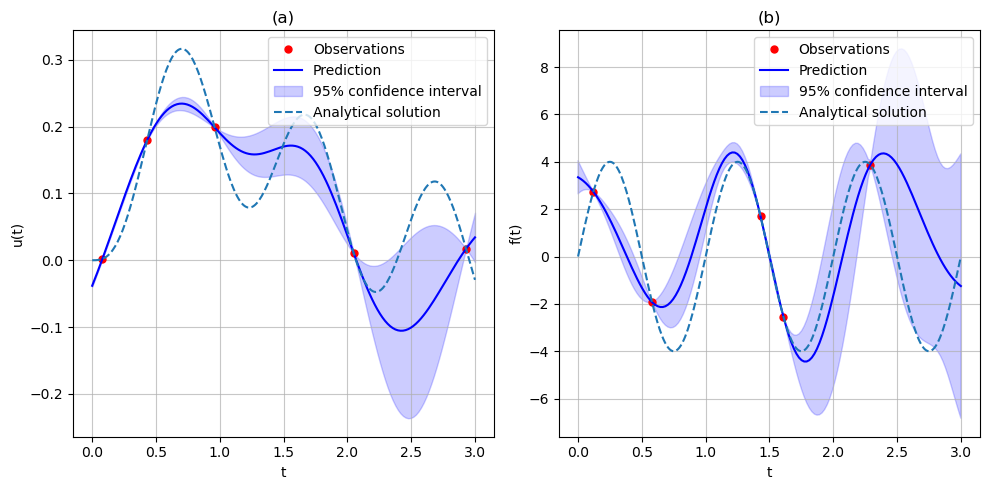

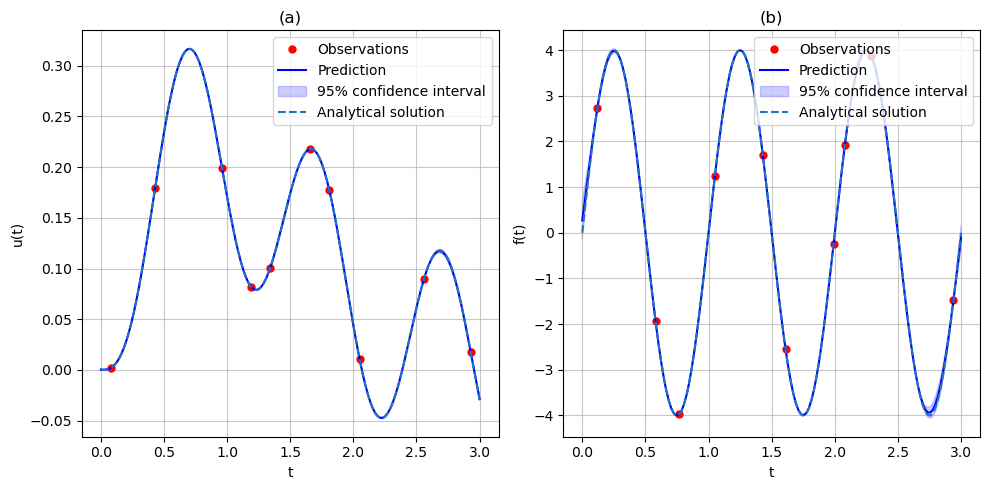

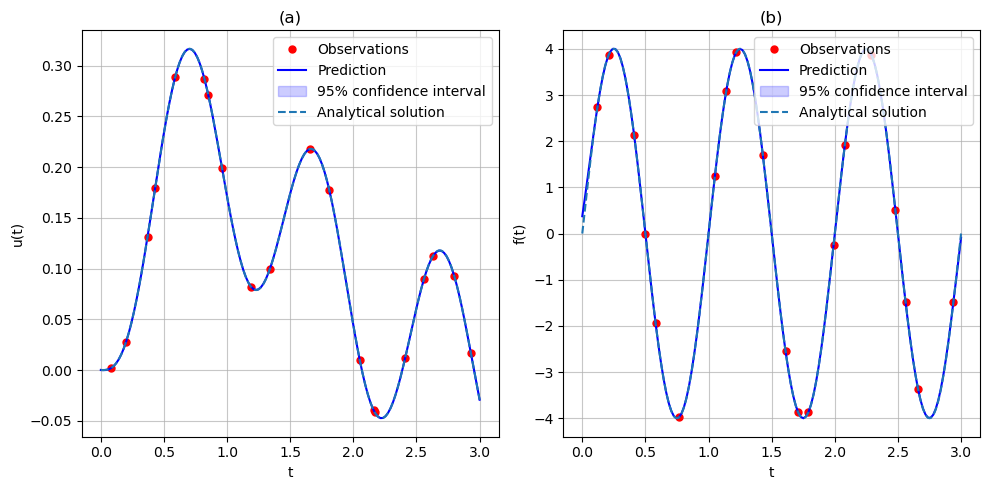

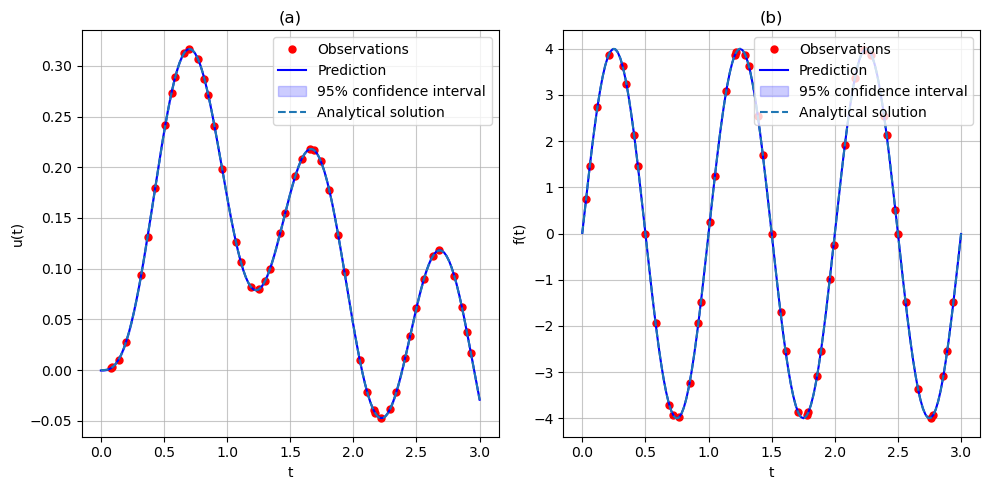

In [9]:
def get_initial_values():
    """returns the initial values for the hyperparameters
    for the length scales we initialize them randomly as log(l) ~ U(-2.5,1)
    """
    rng = np.random.default_rng()
    theta_initial = np.zeros((5))
    theta_initial[0] = np.exp(rng.uniform(-1.3, 0.3, 1))
    theta_initial[1] = rng.uniform(0, 1, 1)
    theta_initial[2] = rng.uniform(0, 3, 1)
    theta_initial[3] = rng.uniform(0, 3, 1)
    theta_initial[4] = rng.uniform(1, 4, 1)
    return theta_initial
n_iterations = 1000
for n in [5,10,20,50]:
    print("This is model with n = ", n)
    modeln = PhysicsInformedGP_regressor(kernel,timedependence=False, params = params)
    modeln.set_training_data("damped_m1k2b1.csv",n,[1e-8,1e-8],seeds_training)
    modeln.set_validation_data(1000)
    modeln.train("Nelder-Mead",n_iterations,12,{'theta_initial': get_initial_values,   #needed for all optimization methods
                                            'bounds': ((1e-2, None), (1e-5, None), (1e-2, None),(1e-2, None),(1e-2,None)), #needed for TNC and L-BFGS-B
                                            'gtol': 1e-6})
    modeln.predict_model(X_star)
    modeln.plot_prediction(X_star,"",None)
    modeln.error()
    #modeln.MSE
    print(modeln)
    print("-----------------------------------------------------------")